<a href="https://colab.research.google.com/github/bluegitter/Large-Time-Series-Model/blob/main/examples/quickstart_zero_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use Python 3.10 and this transformers==4.40.1 for stable compatibility
! pip install transformers==4.40.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.2
    Uninstalling transformers-4.48.2:
      Successfully uninstalled transformers-4.48.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.1 which is incompatible.


In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM

In [11]:
# load model and dataset
model = AutoModelForCausalLM.from_pretrained('thuml/timer-base-84m', trust_remote_code=True)
# df = pd.read_csv("https://raw.githubusercontent.com/WenWeiTHU/TimeSeriesDatasets/refs/heads/main/ETT-small/ETTh2.csv")
df = pd.read_csv("https://github.com/bluegitter/wind-predict/raw/refs/heads/main/data/jx_fd.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
# perpare input
lookback_length = 1440      # support the maximum context length up to 2880
seqs = torch.tensor(df["POWER"][:lookback_length]).unsqueeze(0).float()
print(df["POWER"][:lookback_length])

0       1080.3868
1       1031.6475
2        987.2624
3        918.6139
4        850.1100
          ...    
1435    1575.5028
1436    1610.7617
1437    1616.3165
1438    1601.9006
1439    1607.1748
Name: POWER, Length: 1440, dtype: float64


In [14]:
# generate forecast
prediction_length = 96     # forecast the next 96 timestamps, supporting maximum prediction length encompassed in the context length
output = model.generate(seqs, max_new_tokens=prediction_length)

In [15]:
print(output.shape)
print(output)

torch.Size([1, 96])
tensor([[1611.4210, 1633.0215, 1642.8268, 1643.5181, 1624.9492, 1609.6826,
         1595.3336, 1573.8163, 1565.2974, 1564.0697, 1548.0361, 1538.5110,
         1520.9136, 1502.8936, 1465.0681, 1454.6946, 1445.5769, 1426.0775,
         1423.5996, 1401.9880, 1381.0851, 1366.4062, 1342.5862, 1342.6248,
         1326.4536, 1326.7948, 1304.4878, 1272.5596, 1238.7793, 1211.7104,
         1187.6951, 1157.9111, 1158.1782, 1160.8575, 1162.7017, 1158.5452,
         1135.7091, 1117.2065, 1101.3567, 1085.1008, 1084.9932, 1080.9293,
         1087.1428, 1079.9716, 1061.5736, 1048.8114, 1020.0034, 1018.0588,
         1013.1448, 1023.4487, 1021.9130, 1015.5007, 1003.7162,  972.7252,
          962.7357,  959.8181,  967.6808,  974.7163,  972.9606,  975.8032,
          962.7903,  958.5938,  939.9500,  937.2923,  952.0685,  960.3795,
          961.8657,  947.1804,  938.1437,  942.4844,  924.8478,  936.7866,
          939.5762,  956.1747,  962.6443,  942.7820,  929.9557,  932.2342,
     

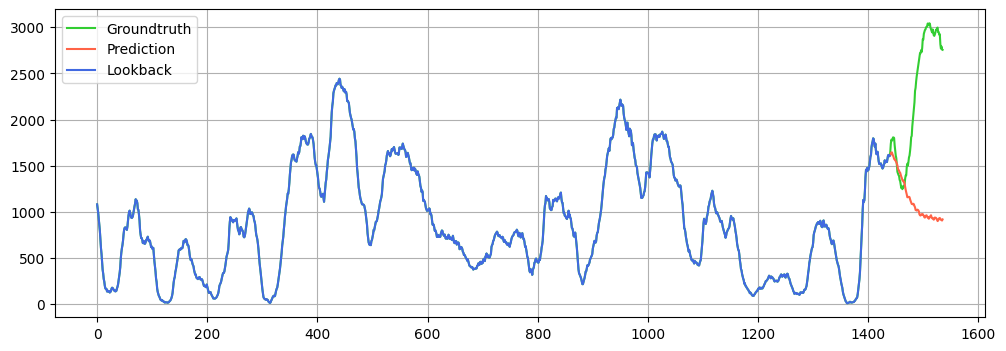

In [17]:
# plot the prediction

plt.figure(figsize=(12, 4))
plt.plot(df["POWER"][:lookback_length + prediction_length], color="limegreen", label="Groundtruth")
plt.plot(range(lookback_length, lookback_length + prediction_length), output[0], color="tomato", label="Prediction")
plt.plot(df["POWER"][:lookback_length], color="royalblue", label="Lookback")
plt.legend()
plt.grid()
plt.show()